In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import data
data = pd.read_csv('./results/total.csv')

print(data)

          music             image Name  time button
0     happy.mp3  Frustrated pose 6.jpg  1442  happy
1     happy.mp3       Bored pose 2.jpg   984    sad
2     happy.mp3       Angry face 2.jpg  1040    sad
3     happy.mp3  Frustrated pose 4.jpg   848    sad
4     happy.mp3           Mother 8.jpg   609  happy
...         ...                    ...   ...    ...
1270    sad.mp3     Neutral face 3.jpg   921  happy
1271    sad.mp3             Baby 2.jpg   952  happy
1272    sad.mp3     Neutral face 1.jpg  2482    sad
1273    sad.mp3         Surprise 2.jpg   953  happy
1274    sad.mp3         Sad face 3.jpg  1320    sad

[1275 rows x 4 columns]


In [2]:
musicGroups = data.groupby('music')

# happy music
happyMusicGroup = musicGroups.get_group('happy.mp3')
numHappyMusic = happyMusicGroup.shape[0]
happyMusicMeanTime = happyMusicGroup['time'].mean()
propHappy = (happyMusicGroup['button'] == 'happy').sum() / numHappyMusic
print(f'happyMusicMeanTime: {happyMusicMeanTime}')

# sad music
sadMusicGroup = musicGroups.get_group('sad.mp3')
numSadMusic = sadMusicGroup.shape[0]
sadMusicMeanTime = sadMusicGroup['time'].mean()
propSad = (sadMusicGroup['button'] == 'sad').sum() / numSadMusic
print(f'sadMusicMeanTime: {sadMusicMeanTime}')

relativeDifference = (happyMusicMeanTime -
                      sadMusicMeanTime) / happyMusicMeanTime
print(f'relativeDifference: {relativeDifference}')

happyMusicMeanTime: 842.64
sadMusicMeanTime: 872.903448275862
relativeDifference: -0.03591503877796219


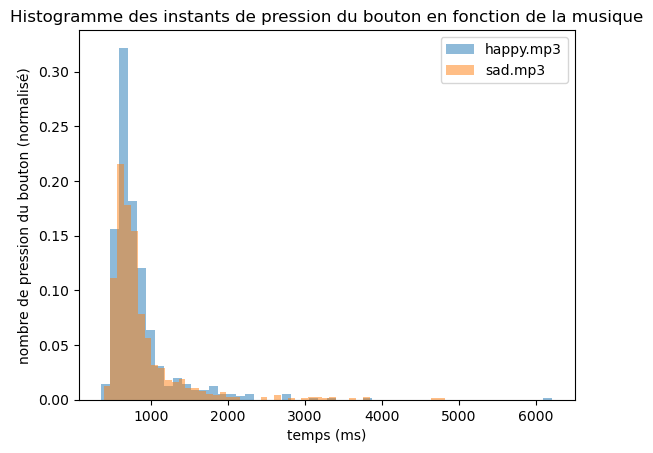

In [3]:
happyMusicWeights = np.ones_like(happyMusicGroup['time']) / numHappyMusic
plt.hist(happyMusicGroup['time'], bins=50, edgecolor='none',
         alpha=0.5, label='happy.mp3', weights=happyMusicWeights)

sadMusicWeights = np.ones_like(sadMusicGroup['time']) / numSadMusic
plt.hist(sadMusicGroup['time'], bins=50, edgecolor='none',
         alpha=0.5, label='sad.mp3', weights=sadMusicWeights)

plt.title('Histogramme des instants de pression du bouton en fonction de la musique')
plt.xlabel('temps (ms)')
plt.ylabel('nombre de pression du bouton (normalisé)')
plt.legend()

In [4]:
buttonGroups = data.groupby('button')

# happy button
happyButtonGroup = buttonGroups.get_group('happy')
numHappyButton = happyButtonGroup.shape[0]
happyButtonMeanTime = happyButtonGroup['time'].mean()

# sad button
sadButtonGroup = buttonGroups.get_group('sad')
numSadButton = sadButtonGroup.shape[0]
sadButtonMeanTime = buttonGroups.get_group('sad')['time'].mean()

numSadButton = (data['button'] == 'sad').sum()
numHappyButton = (data['button'] == 'happy').sum()

sadButtonMeanTime = buttonGroups.get_group('sad')['time'].mean()
happyButtonMeanTime = buttonGroups.get_group('happy')['time'].mean()

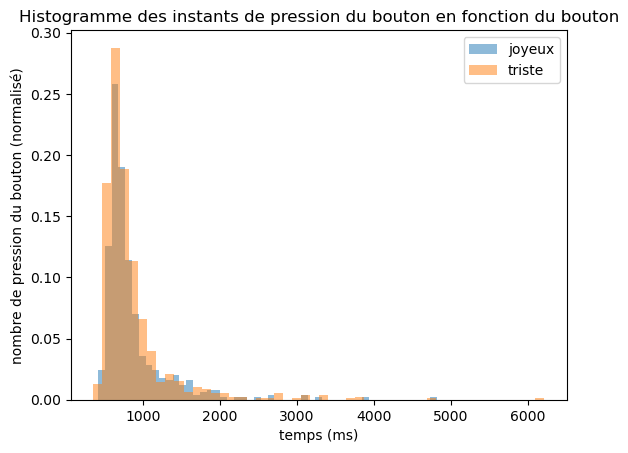

In [5]:
happyButtonWeights = np.ones_like(happyButtonGroup['time']) / numHappyButton
plt.hist(happyButtonGroup['time'], bins=50, edgecolor='none',
         alpha=0.5, label='joyeux', weights=happyButtonWeights)

sadButtonWeights = np.ones_like(sadButtonGroup['time']) / numSadButton
plt.hist(sadButtonGroup['time'], bins=50, edgecolor='none',
         alpha=0.5, label='triste', weights=sadButtonWeights)

plt.title('Histogramme des instants de pression du bouton en fonction du bouton')
plt.xlabel('temps (ms)')
plt.ylabel('nombre de pression du bouton (normalisé)')
plt.legend()

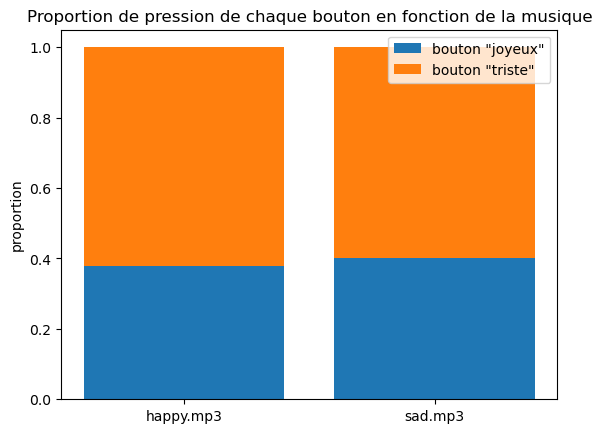

In [6]:
# happy button proportion for each music group
happyButtonProp = [happyMusicGroup['button'].value_counts(normalize=True)[
    'happy'], sadMusicGroup['button'].value_counts(normalize=True)['happy']]
sadButtonProp = [happyMusicGroup['button'].value_counts(
    normalize=True)['sad'], sadMusicGroup['button'].value_counts(normalize=True)['sad']]
ind = [0, 1]

plt.bar(ind, happyButtonProp, label='bouton "joyeux"')
plt.bar(ind, sadButtonProp, bottom=happyButtonProp, label='bouton "triste"')
plt.title('Proportion de pression de chaque bouton en fonction de la musique')
plt.xticks(ind, ['happy.mp3', 'sad.mp3'])
plt.ylabel('proportion')
plt.legend()
plt.show()

In [7]:
table = pd.crosstab(data['music'], data['button'])

print(table)

button     happy  sad
music                
happy.mp3    209  341
sad.mp3      291  434


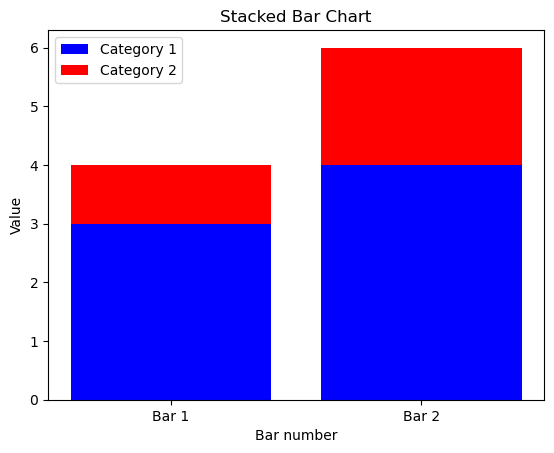

In [8]:
# Values
bar1 = [3, 4]
bar2 = [1, 2]

# Position of bars on x-axis
ind = [1, 2]

plt.bar(ind, bar1, color='b', label='Category 1')
plt.bar(ind, bar2, bottom=bar1, color='r', label='Category 2')

plt.xlabel('Bar number')
plt.ylabel('Value')
plt.title('Stacked Bar Chart')
plt.xticks(ind, ['Bar 1', 'Bar 2'])
plt.legend()
plt.show()